In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# [Step 1] 원본 데이터 로드 및 복사
customer = pd.read_csv("customer_hm.csv")
transactions = pd.read_csv("transactions_hm.csv")
articles = pd.read_csv("articles_hm.csv")

#copy
df_cust = customer.copy()
df_tran = transactions.copy()
df_art = articles.copy()

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


In [355]:
df_tran.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1


In [356]:
df_tran['customer_id']= df_tran['customer_id'].astype(str).str.zfill(10)
df_cust['customer_id']= df_cust['customer_id'].astype(str).str.zfill(10)

df_tran['article_id']= df_tran['article_id'].astype(str).str.zfill(10)
df_art['article_id'] = df_art['article_id'].astype(str).str.zfill(10)

In [357]:
df_art.info()

<class 'pandas.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   article_id                    105542 non-null  str  
 1   product_code                  105542 non-null  int64
 2   prod_name                     105542 non-null  str  
 3   product_type_no               105542 non-null  int64
 4   product_type_name             105542 non-null  str  
 5   product_group_name            105542 non-null  str  
 6   graphical_appearance_no       105542 non-null  int64
 7   graphical_appearance_name     105542 non-null  str  
 8   colour_group_code             105542 non-null  int64
 9   colour_group_name             105542 non-null  str  
 10  perceived_colour_value_id     105542 non-null  int64
 11  perceived_colour_value_name   105542 non-null  str  
 12  perceived_colour_master_id    105542 non-null  int64
 13  perceived_colour_master_n

In [358]:
df_cust.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype
---  ------                  --------------    -----
 0   customer_id             1048575 non-null  str  
 1   FN                      1048575 non-null  int64
 2   Active                  1048575 non-null  int64
 3   club_member_status      1048575 non-null  str  
 4   fashion_news_frequency  1048574 non-null  str  
 5   age                     1048575 non-null  int64
dtypes: int64(3), str(3)
memory usage: 48.0 MB


In [359]:
df_tran.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   t_dat             1048575 non-null  str    
 1   customer_id       1048575 non-null  str    
 2   article_id        1048575 non-null  str    
 3   price             1048575 non-null  float64
 4   sales_channel_id  1048575 non-null  int64  
dtypes: float64(1), int64(1), str(3)
memory usage: 40.0 MB


In [360]:
print(df_cust.shape)
print(df_art.shape)
print(df_tran.shape)

(1048575, 6)
(105542, 25)
(1048575, 5)


In [361]:
### 전처리 시작

print(df_cust.isnull().sum())

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    1
age                       0
dtype: int64


In [362]:
df_cust[df_cust['fashion_news_frequency'].isnull()]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
876108,a79d9cbfaceb0d25a91caccfad167d4d6391fd5bb4292b...,1,0,ACTIVE,NaN,38


In [363]:
df_cust['fashion_news_frequency'] = df_cust['fashion_news_frequency'].fillna("Unknown_but_FN1")
#FN 컬럼 값이 1로 구독중인 것을 확인 했기 때문에
#fashion_news_frequency의 결측치는 "Unknown_but_FN1"로 눈으로 보기 쉽게 작성

In [364]:
df_cust[df_cust['fashion_news_frequency'].isnull()]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age


In [365]:
df_cust['fashion_news_frequency'].value_counts()

fashion_news_frequency
NONE               674698
Regularly          373218
Monthly               658
Unknown_but_FN1         1
Name: count, dtype: int64

In [366]:
df_cust['age_group'] = (df_cust['age'] // 10) * 10
print(df_cust['age_group'].value_counts())
df_cust['age_group'].value_counts(normalize=True)*100

age_group
20    409196
30    181112
50    174715
40    157445
60     56124
10     55256
70     13580
80      1075
90        72
Name: count, dtype: int64


age_group
20    39.024009
30    17.272203
50    16.662137
40    15.015140
60     5.352407
10     5.269628
70     1.295091
80     0.102520
90     0.006866
Name: proportion, dtype: float64

In [367]:
def cate_age(age):
    if age < 20: return '10대'
    elif age < 30: return '20대'
    elif age < 40: return '30대'
    elif age < 50: return '40대'
    elif age < 60: return'50대'
    else: return '60대 이상'

df_cust = df_cust[(df_cust['age'] >= 10) & (df_cust['age'] <= 100)]
df_cust['age_segment'] = df_cust['age'].apply(cate_age)

C:\Users\user\AppData\Local\Temp\ipykernel_12152\822583366.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


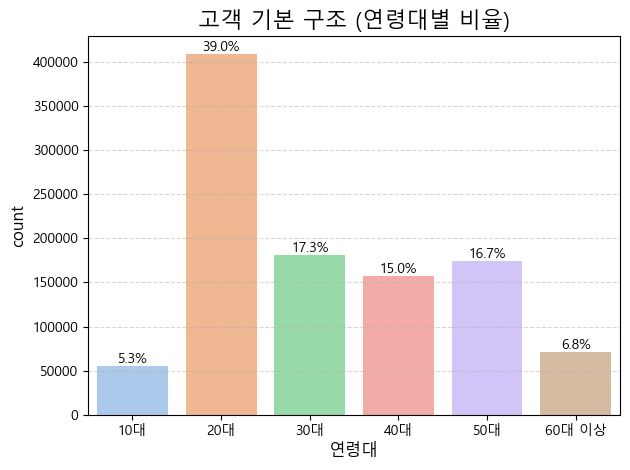

In [368]:

age_order = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
age_cnt = df_cust['age_segment'].value_counts().reindex(age_order)
age_pct = (age_cnt / age_cnt.sum() * 100).round(1)

df_cust['age_segment'] = pd.Categorical(
    df_cust['age_segment'],
    categories=age_order,
    ordered=True
)

ax = sns.countplot(
    x='age_segment',
    data=df_cust,
    order=df_cust['age_segment'].cat.categories,
    palette='pastel',
    legend=False
)

# 막대 위에 비율 표시
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    if height > 0:
        pct = age_pct.iloc[i]
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{pct}%',
            ha='center',
            va='bottom',
            fontsize=10
        )
plt.title('고객 기본 구조 (연령대별 비율)', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [369]:
# [Transactions] 데이터 전처리
df_tran.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   t_dat             1048575 non-null  str    
 1   customer_id       1048575 non-null  str    
 2   article_id        1048575 non-null  str    
 3   price             1048575 non-null  float64
 4   sales_channel_id  1048575 non-null  int64  
dtypes: float64(1), int64(1), str(3)
memory usage: 40.0 MB


In [370]:
df_tran.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [371]:
df_tran["t_dat"] = pd.to_datetime(df_tran["t_dat"], format="%Y-%m-%d")

In [372]:
df_tran.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   t_dat             1048575 non-null  datetime64[us]
 1   customer_id       1048575 non-null  str           
 2   article_id        1048575 non-null  str           
 3   price             1048575 non-null  float64       
 4   sales_channel_id  1048575 non-null  int64         
dtypes: datetime64[us](1), float64(1), int64(1), str(2)
memory usage: 40.0 MB


In [373]:
df_tran["channel"] = df_tran["sales_channel_id"].map({1: "Offline", 2: "Online"})

In [374]:
df_tran["channel"].value_counts()
numbs = df_tran["channel"].value_counts()
print("온라인:", f"{numbs['Online']:,}")
print("오프라인:", f"{numbs['Offline']:,}")
print("전체 거래 건수:", f"{df_tran.shape[0]:,}")

온라인: 729,192
오프라인: 319,383
전체 거래 건수: 1,048,575


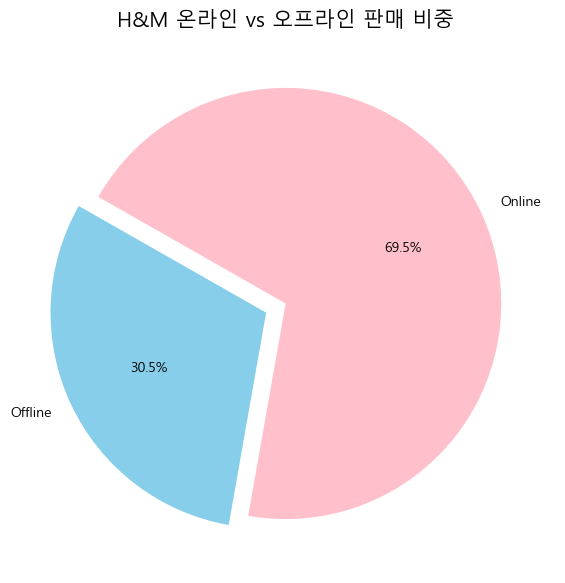

In [375]:
plt.figure(figsize=(7, 7))
# 조각 하나 살짝 띄우기
explode = [0, 0.10]
numbs.plot.pie(
    autopct='%.1f%%',          # 퍼센트 표시
    startangle=260,            # 시작 각도
    colors=['pink', 'skyblue'],
    ylabel='',
    explode=explode
)
plt.title("H&M 온라인 vs 오프라인 판매 비중", fontsize=15)
plt.savefig('channel_pie.png', dpi=300)
plt.show()

In [376]:
df_tran['price'].describe() 
print("price가 0.1 이상:", len(df_tran[df_tran["price"] >= 0.1]))
print("price가 0.2 이상:", len(df_tran[df_tran["price"] >= 0.2]))
print("price가 0.3 이상:", len(df_tran[df_tran["price"] >= 0.3]))
print("price가 0.4 이상:", len(df_tran[df_tran["price"] >= 0.4]))
print("price가 0.5 이상:", len(df_tran[df_tran["price"] >= 0.5]))


price가 0.1 이상: 10803
price가 0.2 이상: 724
price가 0.3 이상: 127
price가 0.4 이상: 29
price가 0.5 이상: 2


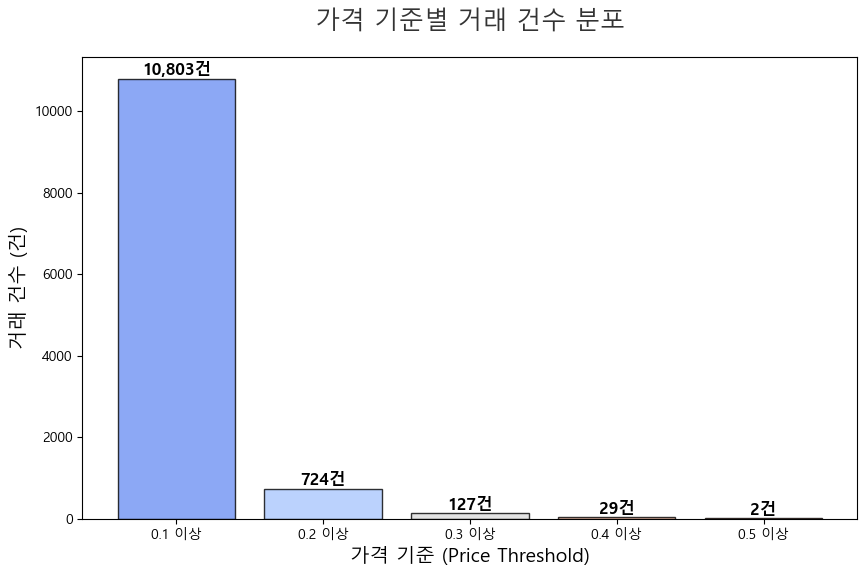

In [377]:
labels = ['0.1 이상', '0.2 이상', '0.3 이상', '0.4 이상', '0.5 이상']
counts = [
    len(df_tran[df_tran["price"] >= 0.1]),
    len(df_tran[df_tran["price"] >= 0.2]),
    len(df_tran[df_tran["price"] >= 0.3]),
    len(df_tran[df_tran["price"] >= 0.4]),
    len(df_tran[df_tran["price"] >= 0.5])
]

plt.figure(figsize=(10, 6))
colors = sns.color_palette("coolwarm", len(labels)) # 가격이 올라갈수록 진해지는 색상

bars = plt.bar(labels, counts, color=colors, edgecolor='black', alpha=0.8)

# 막대 위에 실제 거래 건수 표시 (콤마 포함)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}건', ha='center', va='bottom', fontsize=12, fontweight='bold')


plt.title('가격 기준별 거래 건수 분포', fontsize=18, pad=20, color='#333333')
plt.xlabel('가격 기준 (Price Threshold)', fontsize=14)
plt.ylabel('거래 건수 (건)', fontsize=14)

plt.savefig('price_.png', dpi=300)
plt.show()

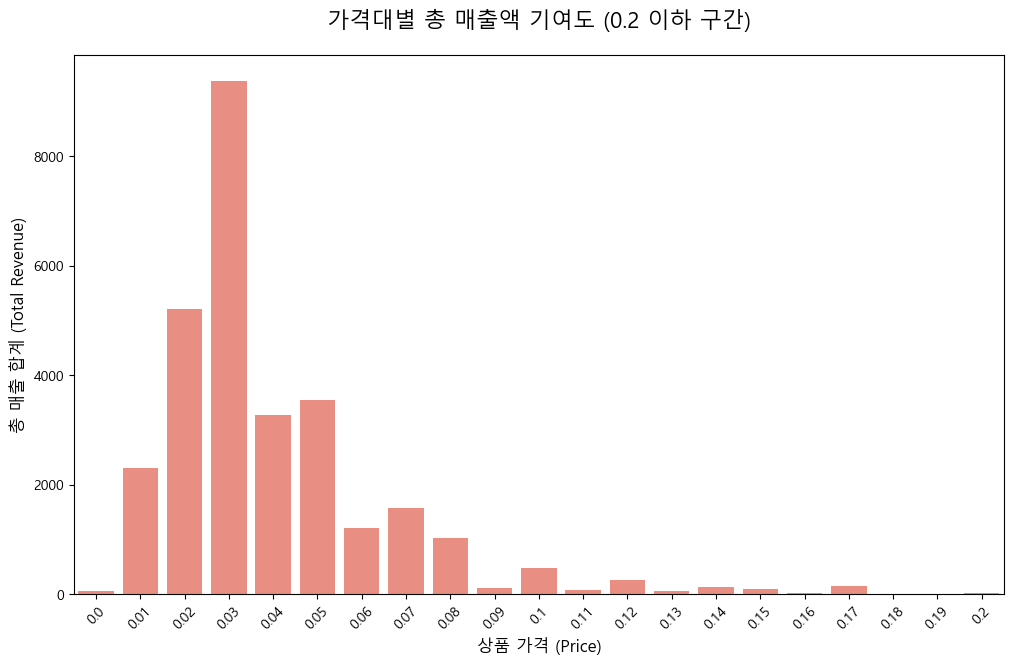

In [378]:
# 가격대를 일정 구간으로 나누어 매출 합계 계산
# 시각화를 위해 0.01 단위로 끊어서 매출 비중을 볼 수 있도록 설정
df_tran['price_group'] = df_tran['price'].round(2) # 가격을 소수점 둘째자리로 반올림
revenue_dist = df_tran.groupby('price_group')['price'].sum().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=revenue_dist[revenue_dist['price_group'] <= 0.2], 
            x='price_group', y='price', color='salmon')

plt.title('가격대별 총 매출액 기여도 (0.2 이하 구간)', fontsize=16, pad=20)
plt.xlabel('상품 가격 (Price)', fontsize=12)
plt.ylabel('총 매출 합계 (Total Revenue)', fontsize=12)
plt.xticks(rotation=45) # 글자가 겹치지 않게 회전
plt.savefig('price_bar_chart.png', dpi=300)
plt.show()

In [379]:
high_price_transactions = df_tran[df_tran["price"] >= 0.1]
high_price_transactions['channel'].replace({1: 'Offline', 2: 'Online'}).value_counts()

channel_counts = (
    high_price_transactions['channel']
    .replace({1: 'Offline', 2: 'Online'})
    .value_counts()
)

channel_ratio = channel_counts / channel_counts.sum() * 100

result_df = pd.DataFrame({
    'count': channel_counts,
    'ratio(%)': channel_ratio.round(2)
})

result_df


,count,ratio(%)
channel,,
Online,9875,91.41
Offline,928,8.59


In [380]:
df_tran['year_month'] = df_tran['t_dat'].dt.to_period('M')

In [381]:
monthly_sales = df_tran.groupby('year_month').size()
monthly_price = df_tran.groupby('year_month')['price'].sum()

print(monthly_price)

year_month
2019-01    2148.279639
2019-02    2006.034201
2019-03    2395.173487
2019-04    2725.229843
2019-05    2768.568961
2019-06    3113.444654
2019-07    2571.945537
2019-08    1960.310828
2019-09    2581.655388
2019-10    2376.303726
2019-11    2482.021880
2019-12    1999.556979
Freq: M, Name: price, dtype: float64


In [382]:
best_month = monthly_price.idxmax()
best_value = monthly_price.max()

print("가장 매출이 높은 달:", best_month)
print("그 달의 매출:", best_value) 

가장 매출이 높은 달: 2019-06
그 달의 매출: 3113.444654044


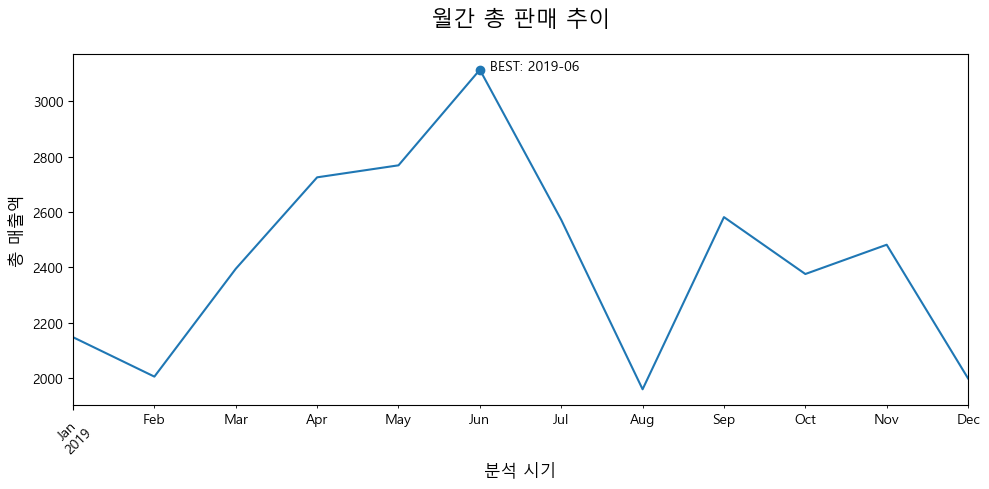

In [383]:
plt.figure(figsize=(10,5))
monthly_price.plot()

plt.scatter(best_month.to_timestamp(), best_value)
plt.text(best_month.to_timestamp(), best_value, 
         f"  BEST: {best_month}", fontsize=10)

plt.title("월간 총 판매 추이", fontsize=16, pad=20)
plt.xlabel("분석 시기", fontsize=12)
plt.ylabel("총 매출액", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Y축은 0에서 시작되지 않음을 설명합시다.

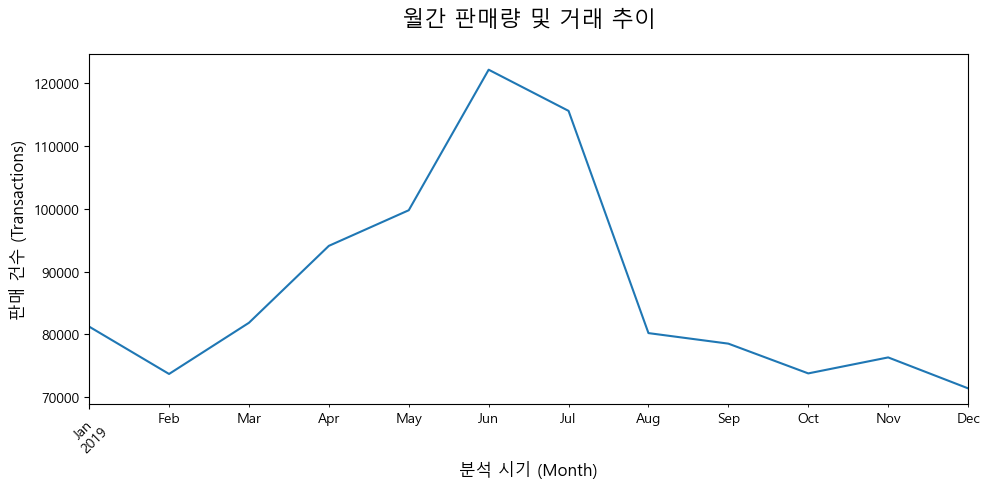

In [384]:
plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("월간 판매량 및 거래 추이", fontsize=16, pad=20)
plt.xlabel("분석 시기 (Month)", fontsize=12)
plt.ylabel("판매 건수 (Transactions)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [385]:
# [Article] 데이터 전처리: 상품 전략 파생변수 생성
df_art.info()

<class 'pandas.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   article_id                    105542 non-null  str  
 1   product_code                  105542 non-null  int64
 2   prod_name                     105542 non-null  str  
 3   product_type_no               105542 non-null  int64
 4   product_type_name             105542 non-null  str  
 5   product_group_name            105542 non-null  str  
 6   graphical_appearance_no       105542 non-null  int64
 7   graphical_appearance_name     105542 non-null  str  
 8   colour_group_code             105542 non-null  int64
 9   colour_group_name             105542 non-null  str  
 10  perceived_colour_value_id     105542 non-null  int64
 11  perceived_colour_value_name   105542 non-null  str  
 12  perceived_colour_master_id    105542 non-null  int64
 13  perceived_colour_master_n

In [386]:
df_art.isnull().sum() 

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [387]:
df_art["detail_desc"] = df_art["detail_desc"].fillna("No description")
#결측치를 'No description'으로 대체

In [388]:
df_art.isnull().sum()

article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
dtype: int64

In [389]:
df_art['detail_desc'].value_counts().head()

detail_desc
No description                                                        416
T-shirt in printed cotton jersey.                                     159
Leggings in soft organic cotton jersey with an elasticated waist.     138
T-shirt in soft, printed cotton jersey.                               137
Socks in a soft, jacquard-knit cotton blend with elasticated tops.    136
Name: count, dtype: int64

In [390]:
cols_to_drop = [
    'product_type_no', 
    'graphical_appearance_no', 
    'colour_group_code', 
    'perceived_colour_value_id',
    'perceived_colour_master_id',
    'department_no',
    'index_code',
    'index_group_no',
    'section_no',
    'garment_group_no'
]
df_art_cleaned = df_art.drop(columns=cols_to_drop) 

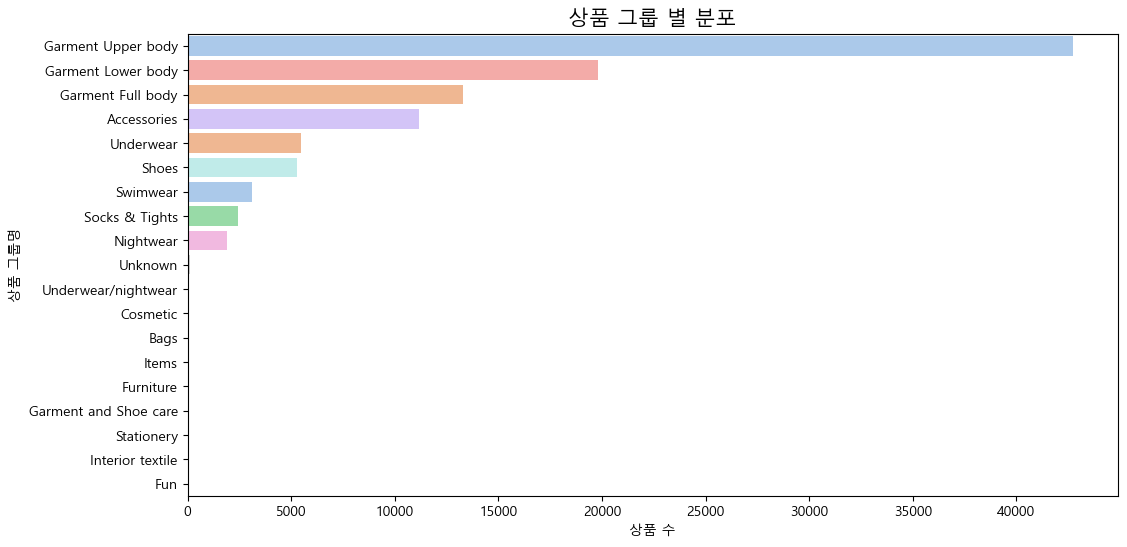

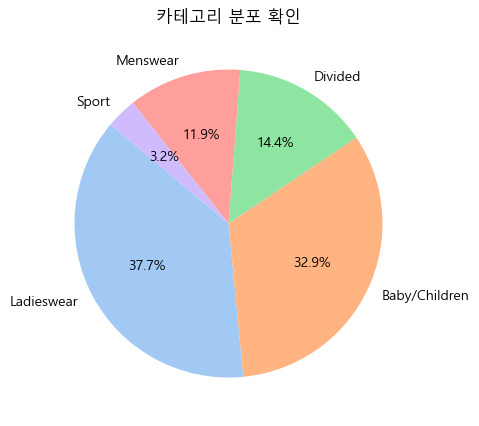

In [391]:
## [articles] EDA 시각화

# 1. product_group_name(상품 그룹) 분포 확인 (가로형 막대그래프), 내림차순
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_art_cleaned, 
    y='product_group_name', 
    order=df_art_cleaned['product_group_name'].value_counts().index,
    hue='product_group_name',    #개선점 말해줘서 변경
    palette='pastel',
    legend=False    #범례는 안 넣을 것
)
plt.title('상품 그룹 별 분포', fontsize=15)  
plt.xlabel('상품 수')
plt.ylabel('상품 그룹명')
plt.show()

# 2. 카테고리 분포 확인
plt.figure(figsize=(5, 5))
df_art_cleaned['index_group_name'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel'),
    ylabel=''   #ylabel False로 설정(위치변경)
)
plt.title('카테고리 분포 확인')
plt.show()

In [392]:
## 매핑/파생변수 설정
def get_season(row):
    # section_name과 prod_name을 합쳐서 판단
    text = (str(row['section_name']) + " " + str(row['prod_name'])).lower()
    group = str(row['product_group_name']).lower()
    
    # 1. SS
    ss_keywords = [
        'swimwear', 'sport', 'shorts', 'sandals', 'sleeveless', 
        'tank', 'mini', 'beach', 'summer', 'sun', 'flip flop', 
        'skirt', 'dress'
    ]

    # 2. FW 
    fw_keywords = [
        'outerwear', 'knitted', 
        'jacket', 'coat', 'hoodie', 'sweatshirt', 'scarf', 'gloves', 
        'boots', 'heavy', 'fur', 'wool', 'cardigan', 'winter'
    ]
    
    if any(kw in text for kw in ss_keywords) or group in ['swimwear']:
        return 'SS'
    # FW는 오직 두꺼운 옷 키워드가 있을 때만! (items of clothing 조건 제거)
    elif any(kw in text for kw in fw_keywords):
        return 'FW'
    else:
        return 'All-Season'
    
    #파생변수 생성 및 이름만 조금 더 직관적으로 분류
df_art_cleaned['product_season'] = df_art_cleaned.apply(get_season, axis=1)

In [393]:
df_art_cleaned['category_main'] = df_art_cleaned['index_group_name']
#원본 보존하고 복사해서 이름 변경 (메인 카테고리 정의)

In [394]:
def get_color_tone(color):
    color = str(color).lower()
    dark_colors = ['black', 'dark blue', 'dark grey', 'dark red', 'dark pink', 'dark purple', 'dark green', 'dark orange', 'dark beige', 'dark turquoise', 'dark yellow', 'grey', 'bronze/copper']
    light_colors = ['white', 'off white', 'light beige', 'light blue', 'light grey', 'light orange', 'light pink', 'light green', 'light red', 'light yellow', 'light purple', 'transparent', 'light turquoise']
    
    if any(dc in color for dc in dark_colors):
        return 'Dark_Tone'
    elif any(lc in color for lc in light_colors):
        return 'Light_Tone'
    else:
        return 'Neutral_Tone'

df_art_cleaned['color_tone'] = df_art_cleaned['colour_group_name'].apply(get_color_tone)

In [395]:
#톤 검증
print(df_art_cleaned['colour_group_name'].unique())
print("---------------")
print(df_art_cleaned['section_name'].unique())
#시즌 검증
print(df_art_cleaned['product_season'].unique())
print(df_art_cleaned[df_art_cleaned['product_season'] == 'FW']['prod_name'].unique())
print("\n------------")
print(df_art_cleaned[df_art_cleaned['product_season'] == 'SS']['prod_name'].unique())
print("\n------------")
print(df_art_cleaned[df_art_cleaned['product_season'] == 'All-Season']['prod_name'].unique())

<StringArray>
[          'Black',           'White',       'Off White',     'Light Beige',
           'Beige',            'Grey',      'Light Blue',      'Light Grey',
       'Dark Blue',       'Dark Grey',            'Pink',        'Dark Red',
   'Greyish Beige',    'Light Orange',          'Silver',            'Gold',
      'Light Pink',       'Dark Pink', 'Yellowish Brown',            'Blue',
 'Light Turquoise',          'Yellow',  'Greenish Khaki',     'Dark Yellow',
      'Other Pink',     'Dark Purple',             'Red',     'Transparent',
      'Dark Green',       'Other Red',       'Turquoise',     'Dark Orange',
           'Other',          'Orange',      'Dark Beige',    'Other Yellow',
     'Light Green',    'Other Orange',          'Purple',       'Light Red',
    'Light Yellow',           'Green',    'Light Purple',  'Dark Turquoise',
    'Other Purple',   'Bronze/Copper', 'Other Turquoise',     'Other Green',
      'Other Blue',         'Unknown']
Length: 50, dtype: str


In [396]:
### [JOIN]

df_merged = pd.merge(
    df_tran, 
    df_cust, 
    on='customer_id', 
    how='left'
)

print("결합 후 데이터 크기:", df_merged.shape)
print(df_merged.head())

결합 후 데이터 크기: (1048575, 15)
       t_dat                                        customer_id  article_id  \
0 2019-11-05  3e2b60b679e62fb49516105b975560082922011dd752ec...  0698328010   
1 2019-05-22  89647ac2274f54c770aaa4b326e0eea09610c252381f37...  0760597002   
2 2019-05-10  2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...  0488561032   
3 2019-08-26  7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...  0682771001   
4 2019-08-10  3b77905de8b32045f08cedb79200cdfa477e9562429a39...  0742400033   

      price  sales_channel_id  channel  price_group year_month   FN  Active  \
0  0.016932                 2   Online         0.02    2019-11  1.0     1.0   
1  0.033881                 2   Online         0.03    2019-05  0.0     0.0   
2  0.016932                 2   Online         0.02    2019-05  1.0     1.0   
3  0.033881                 2   Online         0.03    2019-08  0.0     0.0   
4  0.003220                 1  Offline         0.00    2019-08  0.0     0.0   

  club_member_status fa

In [397]:
# [JOIN] df_final
df_final = pd.merge(
    df_merged, 
    df_art_cleaned, 
    on='article_id', 
    how='left'
)

In [398]:
print(df_tran.shape)
print(df_final.shape)
df_final.head()

(1048575, 8)
(1048575, 32)


,t_dat,customer_id,article_id,price,sales_channel_id,channel,price_group,year_month,FN,Active,...,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,product_season,category_main,color_tone
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,0698328010,0.016932,2,Online,0.02,2019-11,1.0,1.0,...,Blue,Tops Fancy Jersey,Divided,Divided,Divided Collection,Jersey Fancy,Top in lightweight sweatshirt fabric with drop...,All-Season,Divided,Dark_Tone
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,0760597002,0.033881,2,Online,0.03,2019-05,0.0,0.0,...,White,Jersey,Ladieswear,Ladieswear,Womens Casual,Jersey Fancy,"Short-sleeved blouse in stretch, textured jers...",All-Season,Ladieswear,Light_Tone
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,0488561032,0.016932,2,Online,0.02,2019-05,1.0,1.0,...,Blue,Shorts,Menswear,Menswear,Contemporary Casual,Shorts,Knee-length shorts in soft washed cotton with ...,All-Season,Menswear,Dark_Tone
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,0682771001,0.033881,2,Online,0.03,2019-08,0.0,0.0,...,Black,Bags,Ladies Accessories,Ladieswear,Womens Big accessories,Accessories,Shopper in grained imitation leather with two ...,All-Season,Ladieswear,Dark_Tone
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,0742400033,0.003220,1,Offline,0.00,2019-08,0.0,0.0,...,White,Socks Wall,Menswear,Menswear,Men Underwear,Socks and Tights,"Socks in a soft, fine-knit cotton blend with r...",SS,Menswear,Light_Tone


In [399]:
df_merged.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   t_dat                   1048575 non-null  datetime64[us]
 1   customer_id             1048575 non-null  str           
 2   article_id              1048575 non-null  str           
 3   price                   1048575 non-null  float64       
 4   sales_channel_id        1048575 non-null  int64         
 5   channel                 1048575 non-null  str           
 6   price_group             1048575 non-null  float64       
 7   year_month              1048575 non-null  period[M]     
 8   FN                      812931 non-null   float64       
 9   Active                  812931 non-null   float64       
 10  club_member_status      812931 non-null   str           
 11  fashion_news_frequency  812931 non-null   str           
 12  age                     8

In [400]:
df_final.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   t_dat                         1048575 non-null  datetime64[us]
 1   customer_id                   1048575 non-null  str           
 2   article_id                    1048575 non-null  str           
 3   price                         1048575 non-null  float64       
 4   sales_channel_id              1048575 non-null  int64         
 5   channel                       1048575 non-null  str           
 6   price_group                   1048575 non-null  float64       
 7   year_month                    1048575 non-null  period[M]     
 8   FN                            812931 non-null   float64       
 9   Active                        812931 non-null   float64       
 10  club_member_status            812931 non-null   str           
 11  fashion_n

In [401]:
df_merged.describe()

,t_dat,price,sales_channel_id,price_group,FN,Active,age,age_group
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,812931.000000,812931.000000,812931.000000,812931.000000
mean,2019-06-27 12:01:40.730991,2.777915e-02,1.695412e+00,2.793405e-02,0.433205,0.427052,36.363022,31.971643
min,2019-01-01 00:00:00,2.372880e-04,1.000000e+00,0.000000e+00,0.000000,0.000000,16.000000,10.000000
25%,2019-04-08 00:00:00,1.523729e-02,1.000000e+00,2.000000e-02,0.000000,0.000000,26.000000,20.000000
50%,2019-06-25 00:00:00,2.540678e-02,2.000000e+00,3.000000e-02,0.000000,0.000000,32.000000,30.000000
75%,2019-09-17 00:00:00,3.388136e-02,2.000000e+00,3.000000e-02,1.000000,1.000000,48.000000,40.000000
max,2019-12-31 00:00:00,5.067797e-01,2.000000e+00,5.100000e-01,1.000000,1.000000,99.000000,90.000000
std,NaN,1.935764e-02,4.602328e-01,1.909733e-02,0.495519,0.494650,13.007296,13.200541


In [402]:
df_merged.duplicated().sum()

np.int64(8474)

In [403]:
df_merged.isnull().sum()

t_dat                          0
customer_id                    0
article_id                     0
price                          0
sales_channel_id               0
channel                        0
price_group                    0
year_month                     0
FN                        235644
Active                    235644
club_member_status        235644
fashion_news_frequency    235644
age                       235644
age_group                 235644
age_segment               235644
dtype: int64

In [404]:
cat_cols = [
    'FN', 'Active', 'club_member_status', 
    'fashion_news_frequency', 'age_segment'
]

df_final[cat_cols] = df_final[cat_cols].astype('object').fillna('Unknown')
df_final[cat_cols].isnull().sum()

FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age_segment               0
dtype: int64

In [405]:
df_final['age_segment'].value_counts(normalize=True)

age_segment
20대        0.316840
Unknown    0.224728
30대        0.158149
50대        0.129976
40대        0.120895
60대 이상     0.036298
10대        0.013114
Name: proportion, dtype: float64

In [406]:
cat_cols = [
    'FN', 'Active', 'club_member_status', 
    'fashion_news_frequency', 'age_segment'
]

df_final[cat_cols] = df_final[cat_cols].astype('object').fillna('Unknown')
df_final[cat_cols].isnull().sum()

FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age_segment               0
dtype: int64

In [407]:
df_final.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   t_dat                         1048575 non-null  datetime64[us]
 1   customer_id                   1048575 non-null  str           
 2   article_id                    1048575 non-null  str           
 3   price                         1048575 non-null  float64       
 4   sales_channel_id              1048575 non-null  int64         
 5   channel                       1048575 non-null  str           
 6   price_group                   1048575 non-null  float64       
 7   year_month                    1048575 non-null  period[M]     
 8   FN                            1048575 non-null  object        
 9   Active                        1048575 non-null  object        
 10  club_member_status            1048575 non-null  object        
 11  fashion_n

In [408]:
online_df = df_merged[df_merged['channel'] == 'Online']
offline_df = df_merged[df_merged['channel'] == 'Offline']

In [409]:
online_monthly_price = online_df.groupby('year_month')['price'].sum()
offline_monthly_price = offline_df.groupby('year_month')['price'].sum()

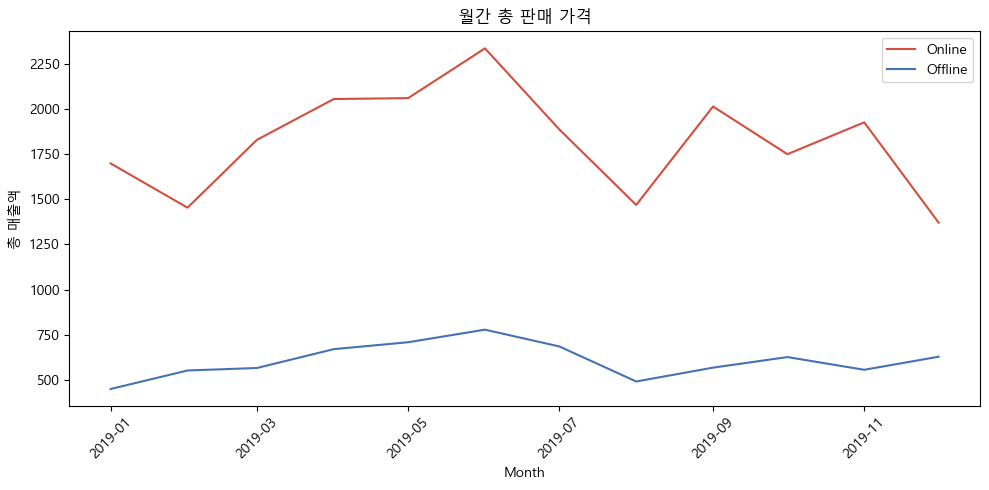

In [410]:
plt.figure(figsize=(10,5))

plt.plot(online_monthly_price.index.to_timestamp(), online_monthly_price.values, label='Online', color="#d64d3f")
plt.plot(offline_monthly_price.index.to_timestamp(), offline_monthly_price.values, label='Offline', color="#4672b4")

plt.title("월간 총 판매 가격")
plt.xlabel("Month")
plt.ylabel("총 매출액")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

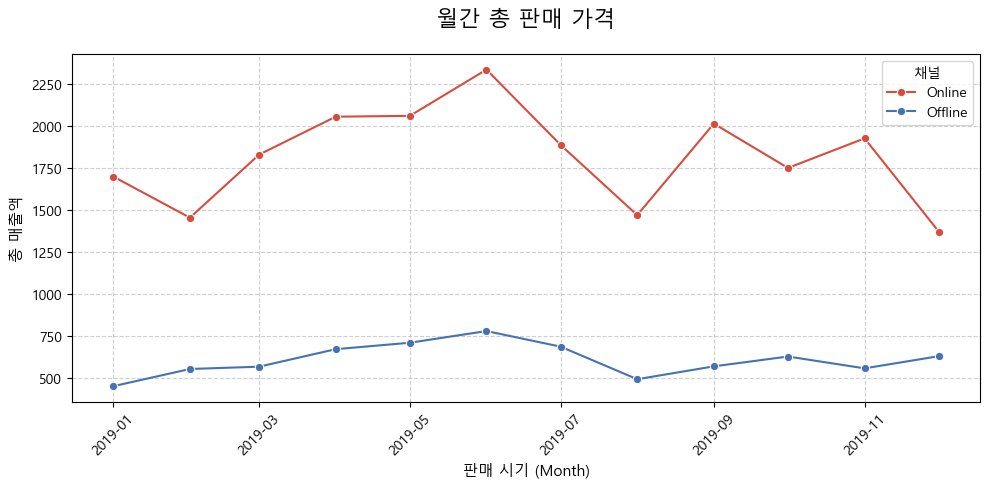

In [411]:
plt.figure(figsize=(10, 5))

# Online 데이터
sns.lineplot(x=online_monthly_price.index.to_timestamp(), 
             y=online_monthly_price.values, 
             label='Online', 
             marker='o',
             color="#d64d3f") 

# Offline 데이터
sns.lineplot(x=offline_monthly_price.index.to_timestamp(), 
             y=offline_monthly_price.values, 
             label='Offline', 
             marker='o',
             color="#4672b4")

plt.title("월간 총 판매 가격", fontsize=16, pad=20)
plt.xlabel("판매 시기 (Month)", fontsize=11)
plt.ylabel("총 매출액", fontsize=11)
plt.xticks(rotation=45)
plt.legend(title='채널')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [412]:
# 1. 원하는 출력 순서 정의 (10대부터 Unknown까지)
ordered_index = ['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']

# 2. 정해진 순서대로 다시 집계 (reindex 사용)
# 이전에 실행한 결과가 섞여 있어도, 이 코드가 순서를 강제로 맞춰추기
age_summary_ordered = df_final['age_segment'].value_counts().reindex(ordered_index)

print("### 연령대별 고객 분포 (정해진 순서대로) ###")
print(age_summary_ordered)

### 연령대별 고객 분포 (정해진 순서대로) ###
age_segment
10대         13751
20대        332231
30대        165831
40대        126767
50대        136290
60대 이상      38061
Unknown    235644
Name: count, dtype: int64


In [413]:
# 1. 연령대별 매출 합계(sum)와 평균(mean) 계산
age_price_analysis = df_final.groupby('age_segment')['price'].agg(['sum', 'mean'])

# 2. 정한 순서대로 정렬 
ordered_index = ['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']
age_price_analysis = age_price_analysis.loc[ordered_index]


age_price_analysis.columns = ['총 매출액', '평균 객단가']

print("### 연령대별 매출 성과 분석 ###")
age_price_analysis.round(4)

### 연령대별 매출 성과 분석 ###


,총 매출액,평균 객단가
age_segment,,
10대,325.1327,0.0236
20대,8999.9204,0.0271
30대,4638.4555,0.0280
40대,3481.6867,0.0275
50대,3975.9159,0.0292
60대 이상,1157.5371,0.0304
Unknown,6549.8768,0.0278


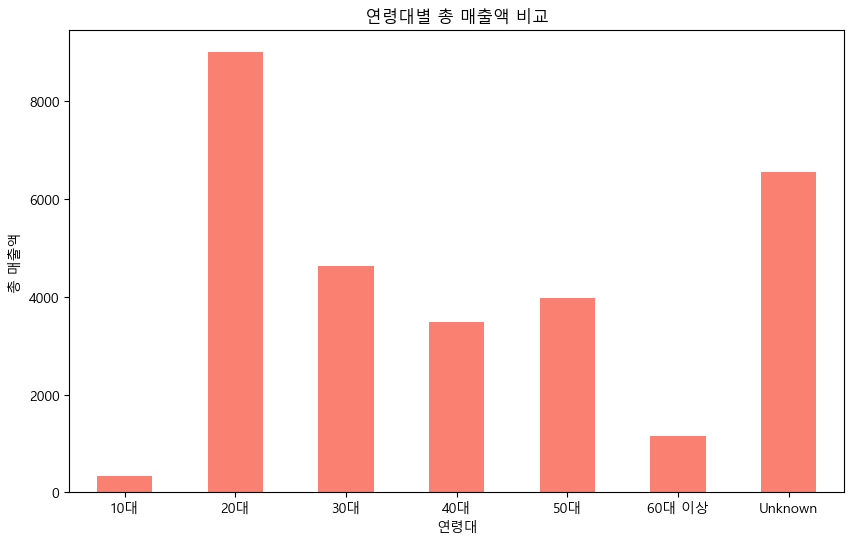

In [414]:
plt.figure(figsize=(10, 6))
age_price_analysis['총 매출액'].plot(kind='bar', color='salmon')

plt.title('연령대별 총 매출액 비교')
plt.xlabel('연령대')
plt.ylabel('총 매출액')
plt.xticks(rotation=0) # 글자 똑바로 세우기

plt.show()

In [415]:
# groupby를 이용해 연령대별, 채널별 거래 건수 집계
# unstack()을 하면 채널 번호(1, 2)가 컬럼으로 올라오게됨
channel_counts = df_final.groupby(['age_segment', 'sales_channel_id']).size().unstack(fill_value=0)

channel_counts = channel_counts.rename(columns={1: 'Offline(1)', 2: 'Online(2)'})

ordered_index = ['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']
channel_counts = channel_counts.loc[ordered_index]

# 4. 비중(%) 계산: 각 연령대 내에서 온/오프라인이 차지하는 비율
channel_perc = channel_counts.div(channel_counts.sum(axis=1), axis=0) * 100

print("### 연령대별 온/오프라인 이용 비중 (%) ###")
channel_perc.round(1)

### 연령대별 온/오프라인 이용 비중 (%) ###


sales_channel_id,Offline(1),Online(2)
age_segment,,
10대,41.9,58.1
20대,29.8,70.2
30대,24.9,75.1
40대,33.1,66.9
50대,33.7,66.3
60대 이상,35.8,64.2
Unknown,30.5,69.5


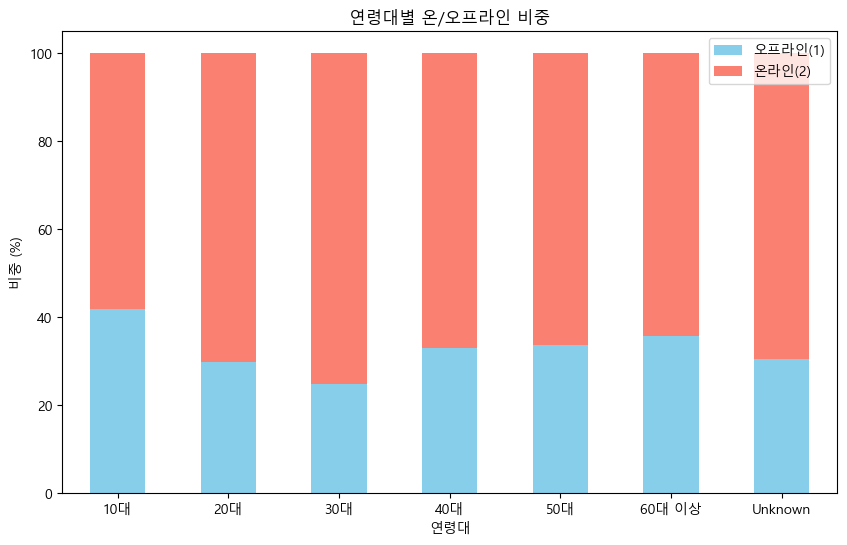

In [416]:
channel_perc.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))

plt.title('연령대별 온/오프라인 비중')
plt.xlabel('연령대')
plt.ylabel('비중 (%)')
plt.legend(title=None, labels=['오프라인(1)', '온라인(2)'])
plt.xticks(rotation=0)
plt.show()

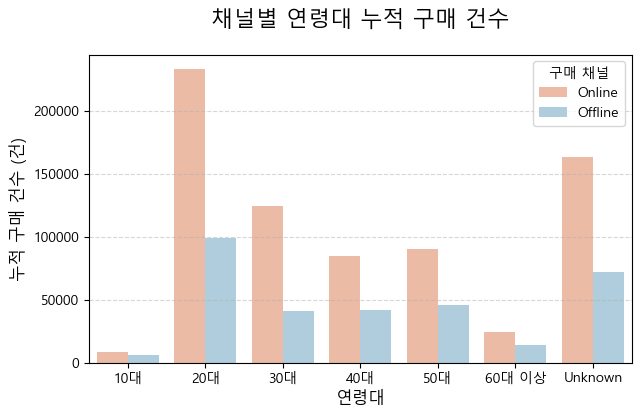

In [417]:
##연령대 및 채널별 구매건수
plt.figure(figsize=(7, 4))

sns.countplot(
    data=df_final, 
    x='age_segment', 
    hue='channel', 
    order=['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown'],
    palette='RdBu'
)

plt.title('채널별 연령대 누적 구매 건수', fontsize=16, pad=20)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('누적 구매 건수 (건)', fontsize=12)  #df_merged 행의 개수(=거래 개수)
plt.legend(title='구매 채널')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

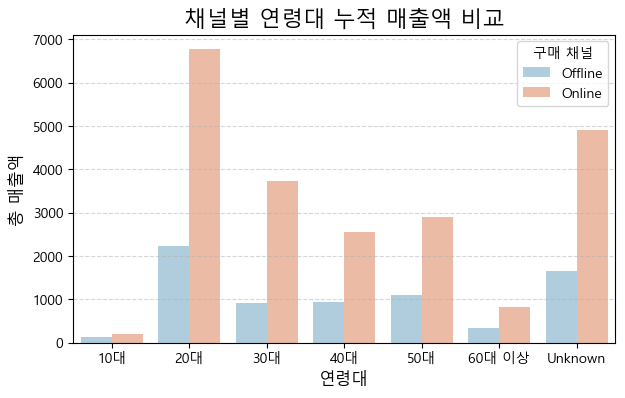

In [418]:
## 연령대 및 채널별 누적 매출액
df_sales = df_final.groupby(['age_segment', 'channel'])['price'].sum().reset_index()

plt.figure(figsize=(7, 4))
sns.barplot(
    data=df_sales, 
    x='age_segment', 
    y='price', 
    hue='channel',
    palette='RdBu_r',
    order=['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']
)

plt.title('채널별 연령대 누적 매출액 비교', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('총 매출액', fontsize=12)
plt.legend(title='구매 채널', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

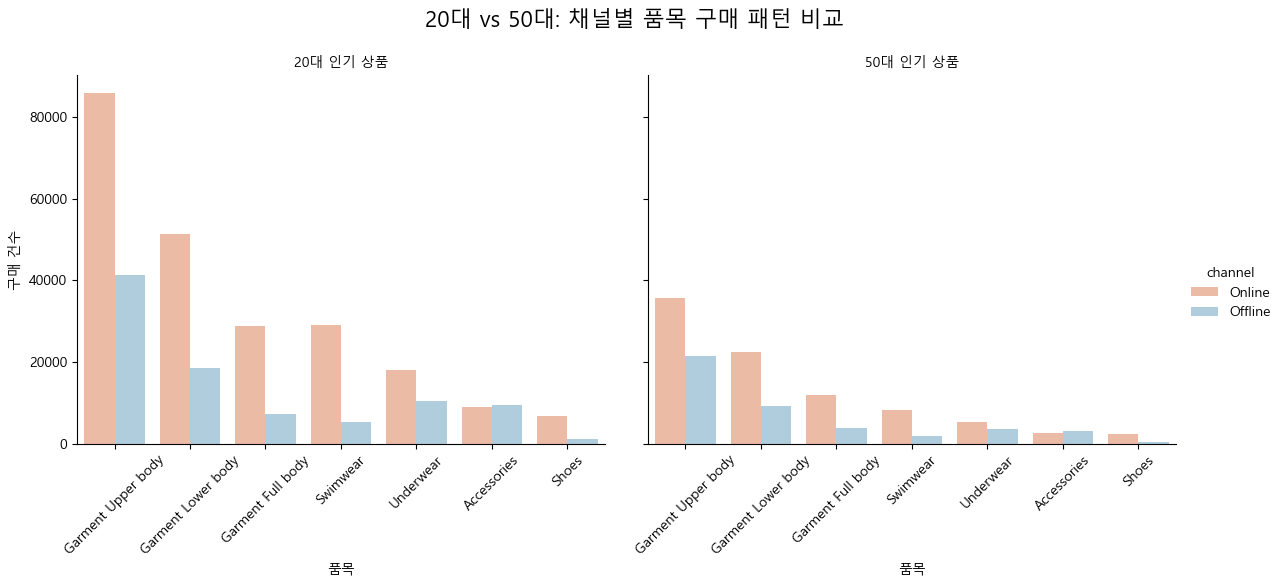

In [419]:
## 20대 VS 50대
df_target = df_final[df_final['age_segment'].isin(['20대', '50대'])]

# 20대와 50대를 옆으로 나란히 배치하여 비교
age_vs = sns.catplot(
    data=df_target, 
    x='product_group_name', 
    hue='channel', 
    col='age_segment', 
    col_order=['20대', '50대'], #20대가 먼저 오도록 수정
    kind='count',
    height=5, aspect=1.2,   #그래프 크기~ 데이터 두개 붙인거라(다중그래프) 모양 어케나올지 모르니까 figsize보다 이거 추천. (한 칸의 세로 높이 대 그거 대 가로비율)
    palette='RdBu',
    order=df_target['product_group_name'].value_counts().head(7).index #상위 7개 품목만
)

# 가독성을 위한 설정
age_vs.set_xticklabels(rotation=45)
age_vs.set_axis_labels("품목", "구매 건수")
age_vs.set_titles("{col_name} 인기 상품")
plt.subplots_adjust(top=0.85)   #치솟지마시오
age_vs.fig.suptitle('20대 vs 50대: 채널별 품목 구매 패턴 비교', fontsize=16)

plt.show()

In [420]:
###서브 인사이트용 

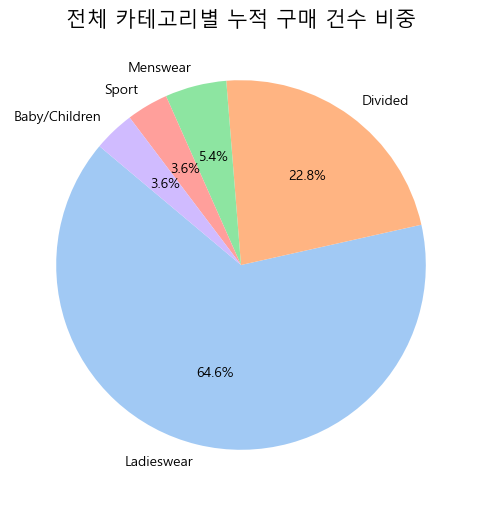

category_main
Ladieswear       677475
Divided          238788
Menswear          56394
Sport             38262
Baby/Children     37656
Name: count, dtype: int64


In [421]:
# 카테고리 거래 건수
category_counts = df_final['category_main'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%',
    startangle=140, 
    colors=sns.color_palette('pastel'),
)

plt.title('전체 카테고리별 누적 구매 건수 비중', fontsize=15)
plt.show()

#실제 카테고리 별 거래량
print(category_counts)

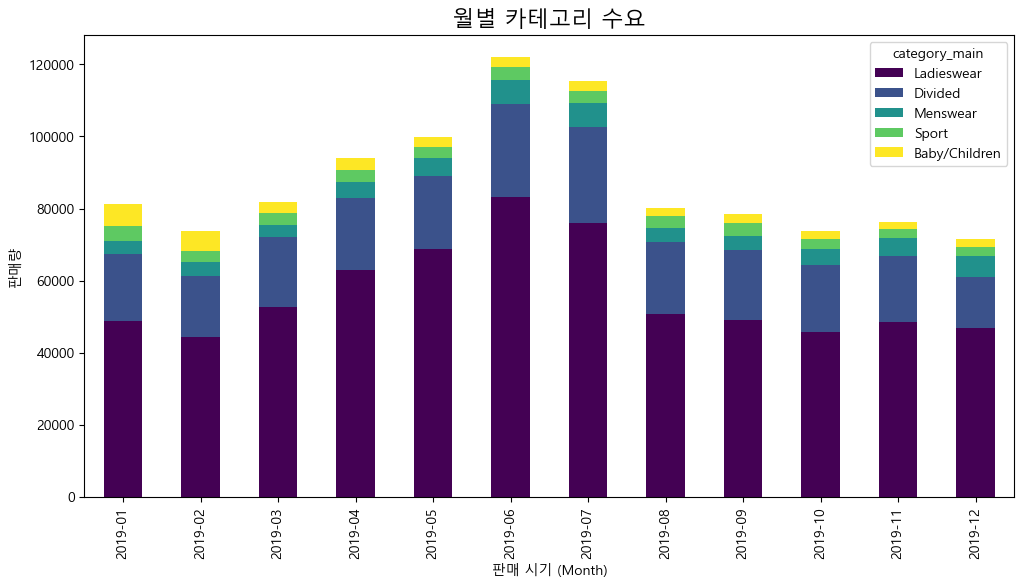

In [422]:
# #월별 카테고리 수요

category_data = df_final.groupby(['year_month', 'category_main']).size().unstack(fill_value=0)

# category_data.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='mako',width=0.8)

## 가독성이 안좋아서 다시 재배치하고 인덱스 부여한 후 정렬
category_sequence = category_data.sum().sort_values(ascending=False).index
category_data[category_sequence].plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='viridis')

plt.title('월별 카테고리 수요', fontsize=16)
plt.ylabel('판매량')
plt.xlabel('판매 시기 (Month)')
plt.show()

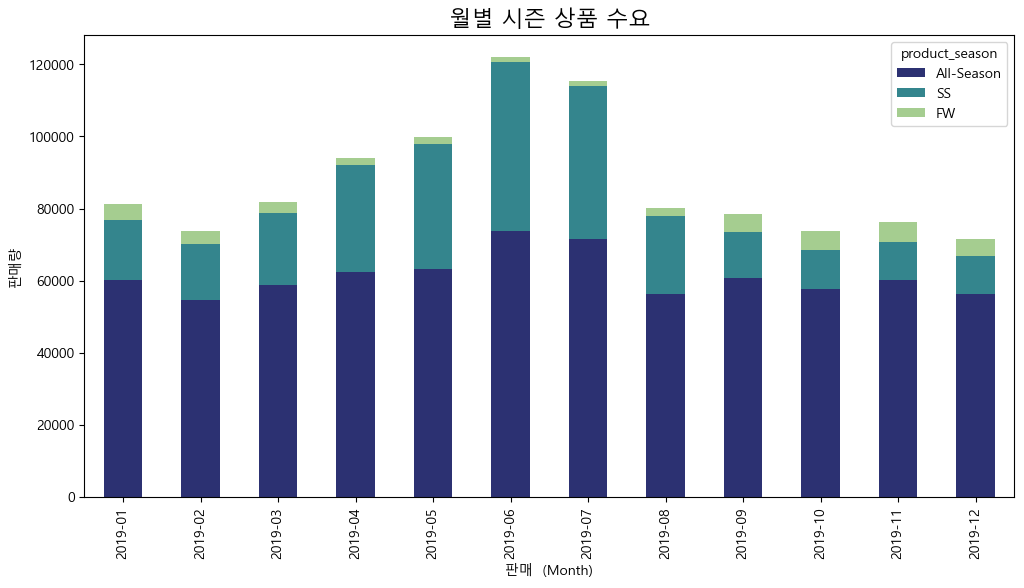

In [423]:
#시즌별 카테고리 수요

season_data = df_final.groupby(['year_month', 'product_season']).size().unstack(fill_value=0)
#너도 안되겠다
season_sequence = season_data.sum().sort_values(ascending=False).index
season_data[season_sequence].plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='crest_r') #로꾸거

plt.title('월별 시즌 상품 수요', fontsize=16)
plt.ylabel('판매량')
plt.xlabel('판매  (Month)')
plt.show()

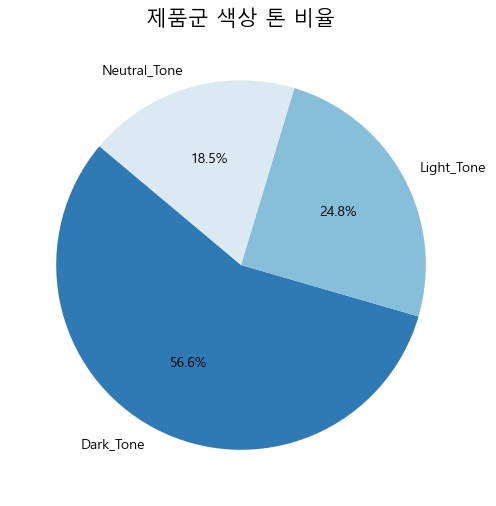

In [424]:
# 제품군 색상 톤 비율
tone_counts = df_final['color_tone'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    tone_counts, 
    labels=tone_counts.index, 
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('RdBu_r'))
plt.title('제품군 색상 톤 비율', fontsize=15)
plt.show()

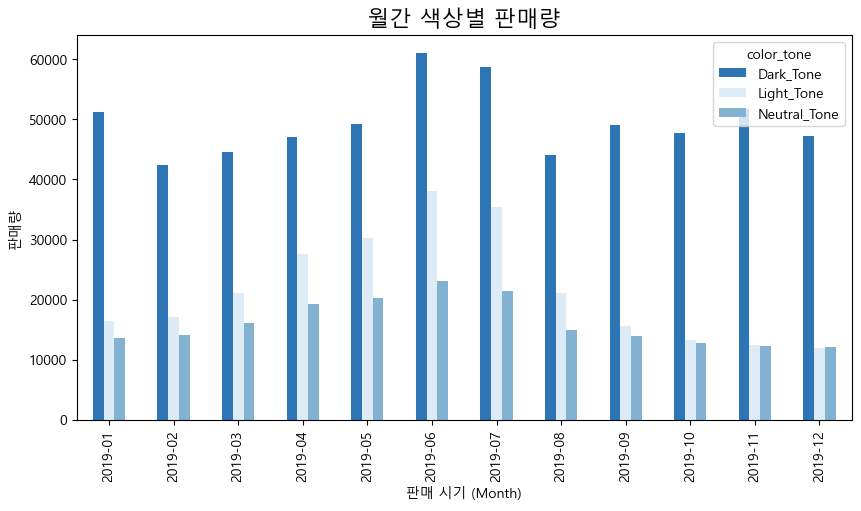

In [425]:
#월간 색상별 판매량
tone_trend = df_final.groupby(['year_month', 'color_tone']).size().unstack(fill_value=0)  #가로로 펼치고 없으면 0으로 채워~
### 색을 위 파이차트랑 통일하려면
my_tones = ['#2E75B6', '#DDEBF7', '#82B1D1']

tone_trend.plot(
    kind='bar', #area로 두는 게 낫나? 어.... barh? 일단 line은 안되고 그냥 bar로 하고 팀원들과 상의
    # stacked=True,     #이것도 상의 (area, bar로 결정되면) line이면 marker='o'도 붙이쉐이
    # color=sns.color_palette('vlag'),
    color = my_tones,
    figsize=(10, 5)
)

plt.title('월간 색상별 판매량', fontsize=16)
plt.ylabel('판매량')
plt.xlabel('판매 시기 (Month)')
plt.show()

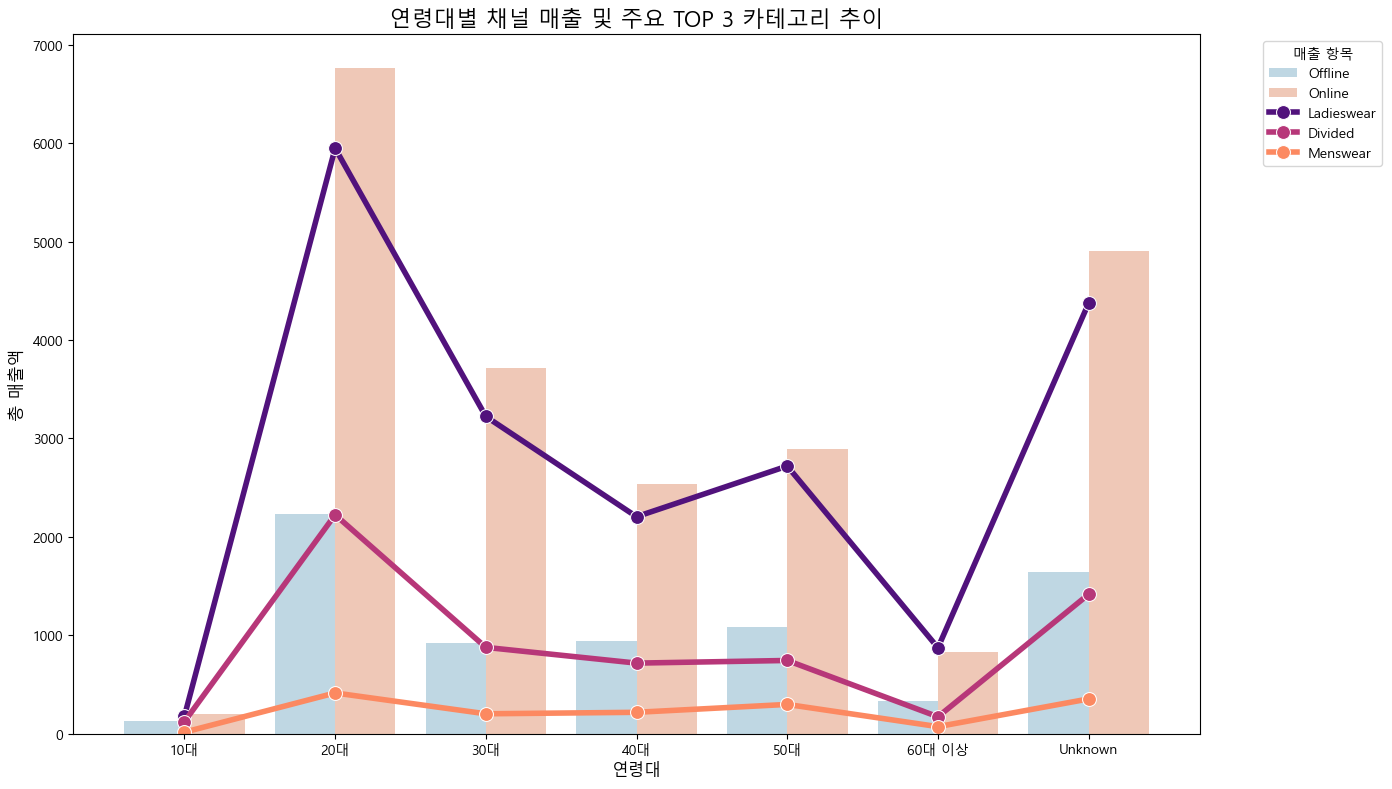

In [426]:
# 0. 위에서쓴거(채널별 연령대 누적 매출액)
df_final_sales = df_final.groupby(['age_segment', 'channel'])['price'].sum().reset_index()

# 1. 카테고리 분류해서 따로 뽑기
top_3_categories = df_final.groupby('category_main')['price'].sum().nlargest(3).index.tolist()    #젤큰거3개뽑기
df_final_cat_top3 = df_final[df_final['category_main'].isin(top_3_categories)]
#OR
#my_target_categories = ['Ladieswear', 'Divided', 'Menswear']
#df_final_cat_target = df_final[df_final['category_main'].isin(my_target_categories)] 해도 됨 

# 2. 합쳐서 나눠담기
df_final_cat_plot = df_final_cat_top3.groupby(['age_segment', 'category_main'])['price'].sum().reset_index()

plt.figure(figsize=(14, 8))

# 연령대별/채널별 매출
sns.barplot(
    data=df_final_sales, 
    x='age_segment', 
    y='price', 
    hue='channel',
    palette='RdBu_r',
    order=['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown'],
    alpha=0.8
)

# 라인차트(카테고리)
sns.lineplot(
    data=df_final_cat_plot,
    x='age_segment',
    y='price',
    hue='category_main',
    hue_order=top_3_categories,
    marker='o',
    markersize=10,
    linewidth=4,
    palette='magma'
)

plt.title('연령대별 채널 매출 및 주요 TOP 3 카테고리 추이', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('총 매출액', fontsize=12)
plt.legend(title='매출 항목', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [1]:
!python -m jupyter nbconvert --to markdown "jinjja_jinjja_final.ipynb"

[NbConvertApp] Converting notebook jinjja_jinjja_final.ipynb to markdown
[NbConvertApp] Support files will be in jinjja_jinjja_final_files\
[NbConvertApp] Making directory jinjja_jinjja_final_files
[NbConvertApp] Writing 60634 bytes to jinjja_jinjja_final.md
